---
title: "Multiple Linear Regression and Evaluation"
format:
  html:
    theme: darkly
embed-resource: true
---

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [5]:
!pip install palmerpenguins


In [6]:

import pandas as pd
from palmerpenguins import load_penguins

penguins = load_penguins()
penguins.head()


dummies = pd.get_dummies(penguins[['species','island']], prefix='species')
print(dummies.head())


   species_Adelie  species_Chinstrap  species_Gentoo  species_Biscoe  \
0            True              False           False           False   
1            True              False           False           False   
2            True              False           False           False   
3            True              False           False           False   
4            True              False           False           False   

   species_Dream  species_Torgersen  
0          False               True  
1          False               True  
2          False               True  
3          False               True  
4          False               True  


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [7]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from palmerpenguins import load_penguins
from sklearn.compose import ColumnTransformer
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split


penguins = load_penguins()
penguins = penguins.dropna()

In [18]:
X=penguins.drop(columns=["bill_depth_mm"], axis = 1)
y=penguins["bill_depth_mm"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

lr = LinearRegression()

data = []


In [19]:
ct1= ColumnTransformer(
    [
    ("Standardize", StandardScaler(), ["bill_length_mm"])
    ],
    remainder="drop"
)

lr_pipeline = Pipeline(
  [("Standardize", ct1),
  ("LR", LinearRegression())]
).set_output(transform="pandas")

fitted_model = lr_pipeline.fit(X_train, y_train)
train_preds = fitted_model.predict(X_train)
test_preds = fitted_model.predict(X_test)


data.append({
    "Model": 1,
    "testMSE": mean_squared_error(y_test,test_preds),
    "trainMSE": mean_squared_error(y_train, train_preds),
})


In [20]:
ct2= ColumnTransformer(
    [
    ("Standardize", StandardScaler(), ["bill_length_mm", "flipper_length_mm"]),
    ],
    remainder="drop"
)

lr_pipeline2 = Pipeline(
  [("Standardize", ct2),
  ("LR", LinearRegression())]
).set_output(transform="pandas")

fitted_model2 = lr_pipeline2.fit(X_train, y_train)
Xtrain_preds = fitted_model2.predict(X_train)
Xtest_preds = fitted_model2.predict(X_test)



data.append({
    "Model": 2,
    "testMSE": mean_squared_error(y_test,Xtest_preds),
    "trainMSE": mean_squared_error(y_train, Xtrain_preds),
})



In [21]:
ct3= ColumnTransformer(
    [
    ("Standardize", StandardScaler(), ["bill_length_mm", "flipper_length_mm","body_mass_g" ]),
    ],
    remainder="drop"
)

lr_pipeline3 = Pipeline(
  [("Standardize", ct3),
  ("LR", LinearRegression())]
).set_output(transform="pandas")

fitted_model3 = lr_pipeline3.fit(X_train, y_train)
Xtrain_preds = fitted_model3.predict(X_train)
Xtest_preds = fitted_model3.predict(X_test)



data.append({
    "Model": 3,
    "testMSE": mean_squared_error(y_test,Xtest_preds),
    "trainMSE": mean_squared_error(y_train, Xtrain_preds),
})

In [22]:
ct4= ColumnTransformer(
    [
    ("Dummify", OneHotEncoder(sparse_output = False), ["sex","island"]),
    ("Standardize", StandardScaler(), ["bill_length_mm", "flipper_length_mm","body_mass_g" ]),
    ],
    remainder="drop"
)

lr_pipeline4 = Pipeline(
  [("Standardize", ct4),
  ("LR", LinearRegression())]
).set_output(transform="pandas")


fitted_model4 = lr_pipeline4.fit(X_train, y_train)
Xtrain_preds = fitted_model4.predict(X_train)
Xtest_preds = fitted_model4.predict(X_test)

data.append({
    "Model": 4,
    "testMSE": mean_squared_error(y_test,Xtest_preds),
    "trainMSE": mean_squared_error(y_train, Xtrain_preds),
})


In [23]:
data = pd.DataFrame(data)
data

,Model,testMSE,trainMSE
0,1,3.499971,3.730617
1,2,2.119265,2.534788
2,3,2.127894,2.516484
3,4,1.042819,1.225663


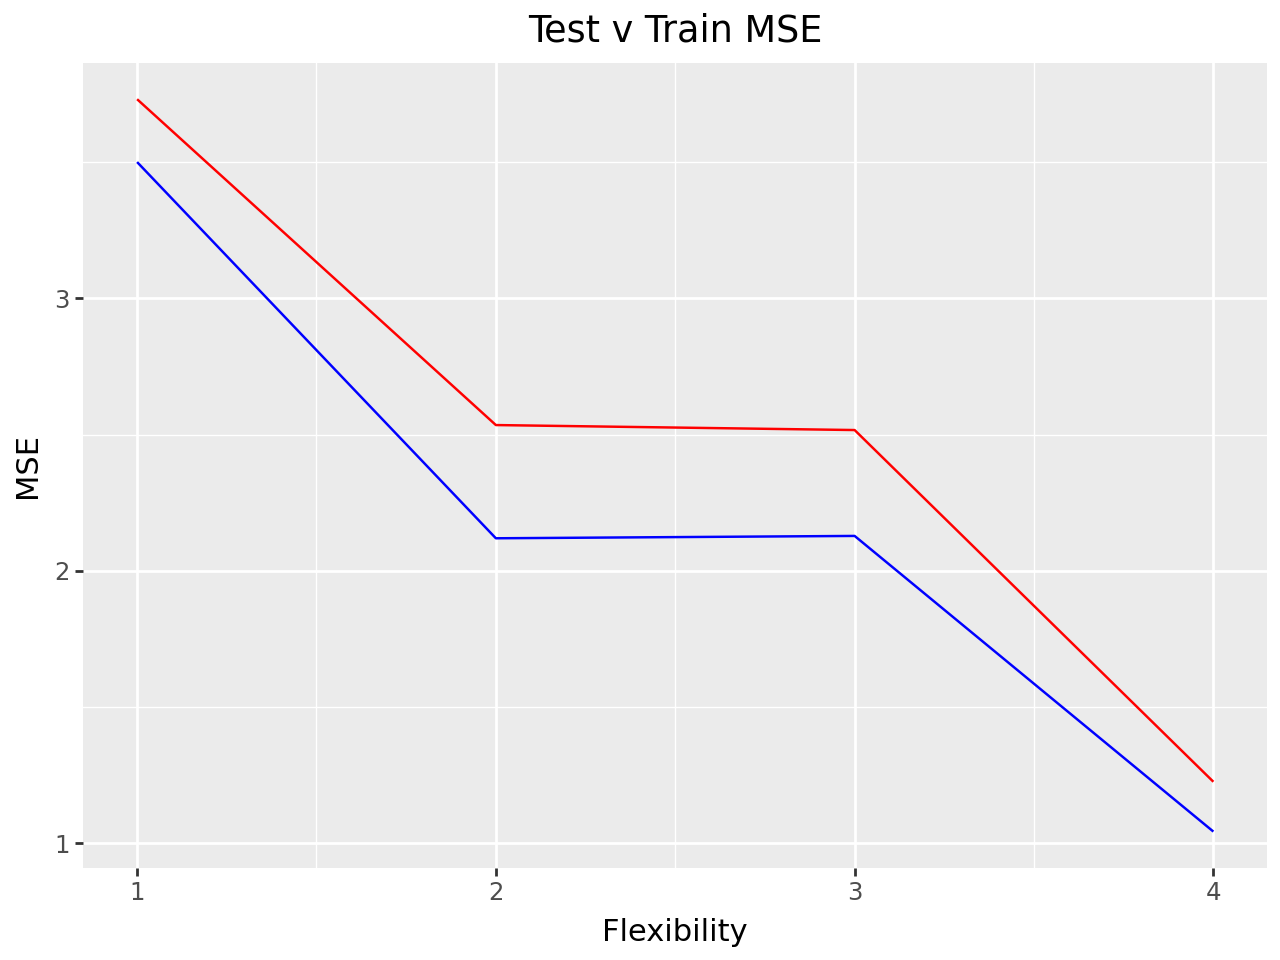

In [25]:
from plotnine import ggplot, aes, geom_point, geom_line, labs



(ggplot(data, aes(x='Model')) +
    geom_line(aes(y="testMSE"), color='blue') +
    geom_line(aes(y="trainMSE"), color='red') +
    labs(title='Test v Train MSE', x='Flexibility', y='MSE')
)

Model 4 has the lowest MSE, so it appears to be the best fit.